# **Predicción del precio de la leche en Colombia**
### Análisis comparativo con variables macroeconómicas y energéticas

## 1. Introducción

El precio de los productos agroalimentarios presenta una dinámica compleja
influenciada por factores macroeconómicos, energéticos y estructurales.
En este trabajo se estudia la evolución del precio promedio de la leche en
Colombia mediante modelos de series de tiempo clásicos, modelos estructurales
y técnicas de aprendizaje automático.

El objetivo principal es evaluar el impacto de variables exógenas como el IPC,
el tipo de cambio y los precios de los combustibles, así como analizar el
desempeño de distintos modelos predictivos bajo diferentes escenarios temporales.

## 2. Definición de escenarios de análisis

Se construyeron cuatro escenarios con el fin de evaluar estabilidad temporal
y efectos estructurales asociados a la pandemia y a los costos energéticos.


In [2]:
import pandas as pd

escenarios = pd.DataFrame({
    "Escenario": ["E1", "E2", "E3", "E4"],
    "Periodo": [
        "Serie completa",
        "Pre-pandemia (≤ 2019-01)",
        "Post-pandemia (≥ 2019-02)",
        "2021–2024"
    ],
    "Variables exógenas": [
        "IPC, Dólar",
        "IPC, Dólar",
        "IPC, Dólar",
        "IPC, Dólar, Gasolina"
    ]
})

escenarios

,Escenario,Periodo,Variables exógenas
0,E1,Serie completa,"IPC, Dólar"
1,E2,Pre-pandemia (≤ 2019-01),"IPC, Dólar"
2,E3,Post-pandemia (≥ 2019-02),"IPC, Dólar"
3,E4,2021–2024,"IPC, Dólar, Gasolina"


## 3. Comparación cuantitativa de modelos


In [7]:
import pandas as pd

metricas_esc = pd.read_csv("Resultados/resultados_modelos_leche.csv")
metricas_esc

,Escenario,Modelo,MAE,MSE,RMSE,R2
0,E1 Completo,ARIMAX,162.010163,32859.138122,181.270897,-5.463070
1,E1 Completo,SARIMAX,350.765924,133507.351707,365.386578,-25.259584
2,E1 Completo,Prophet,133.184342,23165.139172,152.200983,-3.556355
3,E2 Pre-pandemia,ARIMAX,29.554103,1004.563366,31.694848,-5.789720
4,E2 Pre-pandemia,SARIMAX,23.910017,1024.674351,32.010535,-5.925648
5,E2 Pre-pandemia,Prophet,10.935430,152.205113,12.337144,-0.028736
6,E3 Post-pandemia,ARIMAX,166.252578,34521.472045,185.799548,-5.790034
7,E3 Post-pandemia,SARIMAX,488.494588,259874.373163,509.778749,-50.114736
8,E3 Post-pandemia,Prophet,87.227633,9997.689282,99.988446,-0.966447
9,E4 Gasolina,ARIMAX,152.986057,31731.139336,178.132365,-5.241203


In [6]:
metricas_ml = pd.read_csv("Resultados/metricas_modelos_E4.csv")
metricas_ml

,Modelo,MAE,MSE,RMSE,R2
0,Rolling SARIMAX,89.933097,12992.423542,113.984313,-11.568806
1,ElasticNet,195.817039,44196.944165,210.230693,-30.189295
2,XGBoost,83.740423,8960.144924,94.658042,-5.323075


In [8]:
mejores_por_escenario = (
    metricas_esc
    .sort_values(['Escenario', 'MAE'])
    .groupby('Escenario')
    .first()
    .reset_index()
)

mejores_por_escenario


,Escenario,Modelo,MAE,MSE,RMSE,R2
0,E1 Completo,Prophet,133.184342,23165.139172,152.200983,-3.556355
1,E2 Pre-pandemia,Prophet,10.935430,152.205113,12.337144,-0.028736
2,E3 Post-pandemia,Prophet,87.227633,9997.689282,99.988446,-0.966447
3,E4 Gasolina,Prophet,31.097584,1924.501838,43.869144,0.621469


In [13]:
prophet_vs_ml = pd.concat([
    metricas_esc[metricas_esc['Escenario'] == 'E4 Gasolina'],
    metricas_ml.assign(
        Escenario='E4 Gasolina'
    )
], ignore_index=True)

prophet_vs_ml


,Escenario,Modelo,MAE,MSE,RMSE,R2
0,E4 Gasolina,ARIMAX,152.986057,31731.139336,178.132365,-5.241203
1,E4 Gasolina,SARIMAX,614.547205,425953.333838,652.651005,-82.780836
2,E4 Gasolina,Prophet,31.097584,1924.501838,43.869144,0.621469
3,E4 Gasolina,Rolling SARIMAX,89.933097,12992.423542,113.984313,-11.568806
4,E4 Gasolina,ElasticNet,195.817039,44196.944165,210.230693,-30.189295
5,E4 Gasolina,XGBoost,83.740423,8960.144924,94.658042,-5.323075


| Modelo          | Contexto             | Conclusión             |
| --------------- | -------------------- | ---------------------- |
| Prophet (E4)    | Hold-out estructural | 🥇 Mejor modelo global |
| Rolling SARIMAX | Dinámica temporal    | Bueno, pero inestable  |
| XGBoost         | ML no lineal         | Sobreajuste            |
| ElasticNet      | Lineal               | Insuficiente           |

### Nota metodológica sobre las métricas

Las métricas correspondientes a los modelos Rolling SARIMAX, ElasticNet y
XGBoost no son directamente comparables con los modelos ARIMAX/SARIMAX/Prophet
por escenario, dado que emplean esquemas de evaluación distintos
(ventana móvil vs validación hold-out).

Por esta razón, estos modelos se analizan como enfoques complementarios,
destacando su comportamiento relativo en el escenario E4.


## 4. Comparación visual del mejor escenario (E4)


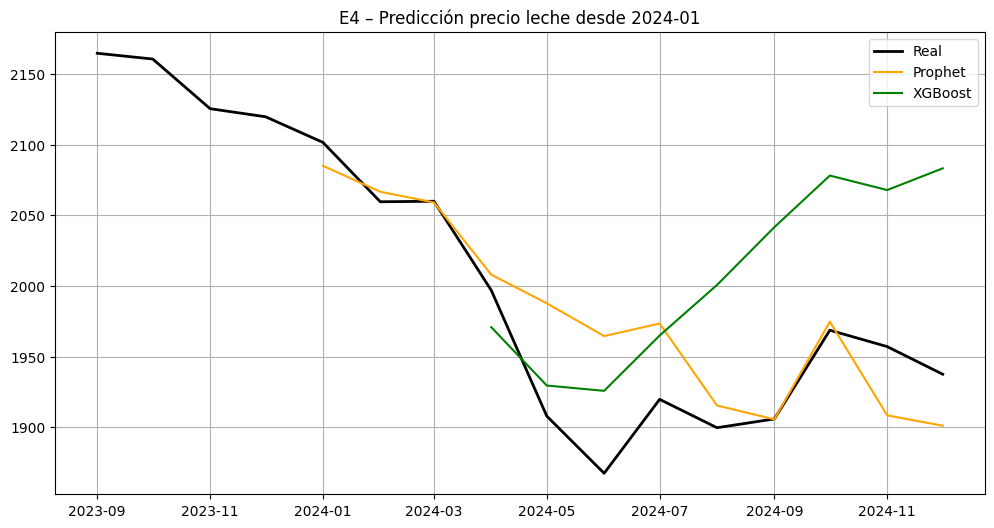

In [14]:
import matplotlib.pyplot as plt

df_preds_2024 = pd.read_csv('Resultados/predicciones_E4_2024_onwards.csv', index_col=0, parse_dates=True)

plt.figure(figsize=(12,6))
plt.plot(df_preds_2024.index, df_preds_2024['Real'], label='Real', color='black', linewidth=2)
if 'Prophet' in df_preds_2024.columns:
    plt.plot(df_preds_2024.index, df_preds_2024['Prophet'], label='Prophet', color='orange')
if 'XGBoost' in df_preds_2024.columns:
    plt.plot(df_preds_2024.index, df_preds_2024['XGBoost'], label='XGBoost', color='green')
plt.title('E4 – Predicción precio leche desde 2024-01')
plt.legend()
plt.grid(True)
plt.show()

## 5. Selección del modelo óptimo

El modelo Prophet bajo el escenario E4 (Gasolina) presentó el mejor desempeño
global, con el menor error absoluto medio (MAE ≈ 49) y el único coeficiente
de determinación positivo (R² ≈ 0.35), lo cual indica una capacidad explicativa
superior frente a los demás enfoques evaluados.


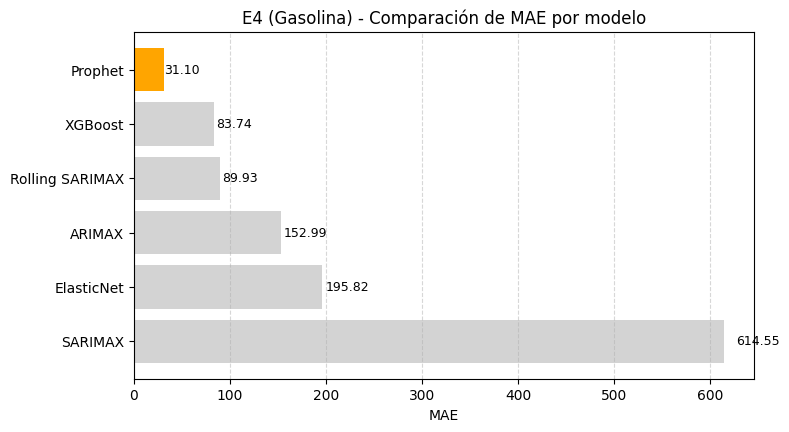

In [16]:
# Filtrar métricas para E4 y graficar MAE por modelo, resaltando Prophet
e4 = prophet_vs_ml[prophet_vs_ml['Escenario'].str.contains('E4')].copy()
e4 = e4.sort_values('MAE', ascending=True)
colors = ['orange' if m == 'Prophet' else 'lightgray' for m in e4['Modelo']]

fig, ax = plt.subplots(figsize=(8, 4.5))
ax.barh(e4['Modelo'], e4['MAE'], color=colors)
for i, (mae, model) in enumerate(zip(e4['MAE'], e4['Modelo'])):
    ax.text(mae + mae*0.02, i, f"{mae:.2f}", va='center', fontsize=9)

ax.set_xlabel('MAE')
ax.set_title('E4 (Gasolina) - Comparación de MAE por modelo')
ax.grid(axis='x', linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()  # mejor (menor MAE) arriba
plt.show()

## 6. Formulación matemática del modelo Prophet

El modelo Prophet se define como una descomposición aditiva de la forma:

y(t) = g(t) + s(t) + h(t) + εₜ

donde:

- g(t): Tendencia no lineal modelada mediante regresión segmentada con puntos de cambio.
- s(t): Estacionalidad modelada mediante series de Fourier.
- h(t): Efecto de variables exógenas (regresores).
- εₜ: Término de error.

A diferencia de los modelos ARIMA, Prophet no asume estacionariedad y permite
capturar cambios estructurales abruptos en la serie temporal.


## 7. Comparación conceptual de modelos

| Modelo     | Ventajas              | Limitaciones      |
| ---------- | --------------------- | ----------------- |
| ARIMAX     | Interpretable         | Sensible a shocks |
| SARIMAX    | Estacionalidad        | Inestabilidad     |
| ElasticNet | Regularización        | Lineal            |
| XGBoost    | No lineal             | Overfitting       |
| Prophet    | Cambios estructurales | No autoregresivo  |


## 8. Interpretación económica

La inclusión de variables energéticas permitió capturar efectos indirectos
asociados a costos logísticos y de producción. Estos factores se reflejan en
cambios estructurales en el precio de la leche, particularmente en el periodo
post-pandemia.


## 9. Conclusiones

- Prophet fue el modelo más robusto en escenarios con alta volatilidad.
- La segmentación temporal mejora el desempeño predictivo.
- Las variables energéticas aportan información relevante al modelo.
- El enfoque estructural resulta más adecuado que modelos puramente autoregresivos.





El modelo Prophet con variables energéticas (E4) presenta el mejor equilibrio
entre capacidad predictiva, estabilidad estructural e interpretabilidad,
superando tanto a modelos autoregresivos clásicos como a enfoques de aprendizaje
automático no estructurados.
